In [114]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpl_pat
import scipy.interpolate
import requests
import datetime

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from access_treasurydirectgov import *
import bond_analytics as ba
import bond_curve as bc
from db_manager_UST import *

In [3]:
myDB = db_manager_UST()

In [43]:
cob = datetime.datetime(2022, 6, 15)
df_cob = myDB.retrieve_as_of(cob)
df = df_cob[df_cob['type'].isin(bc.Conventional_Type)]
df = bc.yield_from_conventional(cob, df)
df.sort_values(by = 'Time-to-maturity', inplace=True)
df = df[df['Time-to-maturity'] > 0.25].copy()
df['Term-int'] = np.round(df['Term'])


In [70]:
line.get_color()

'#1f77b4'

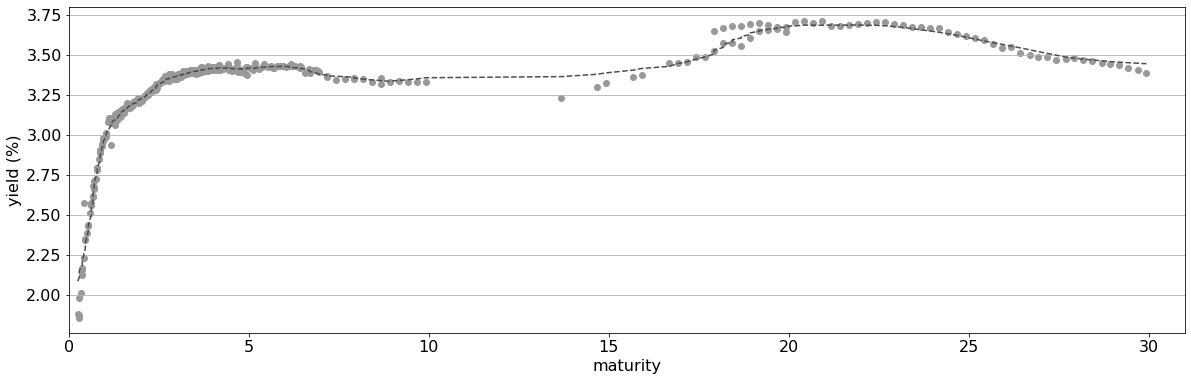

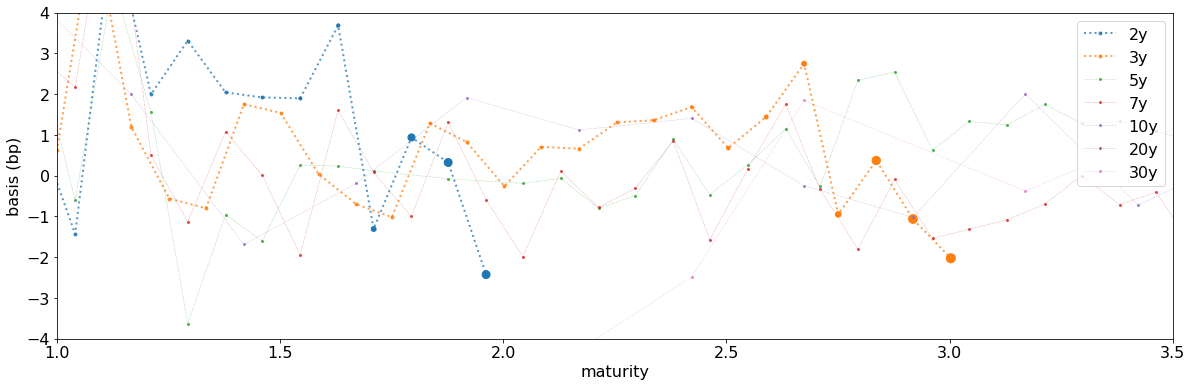

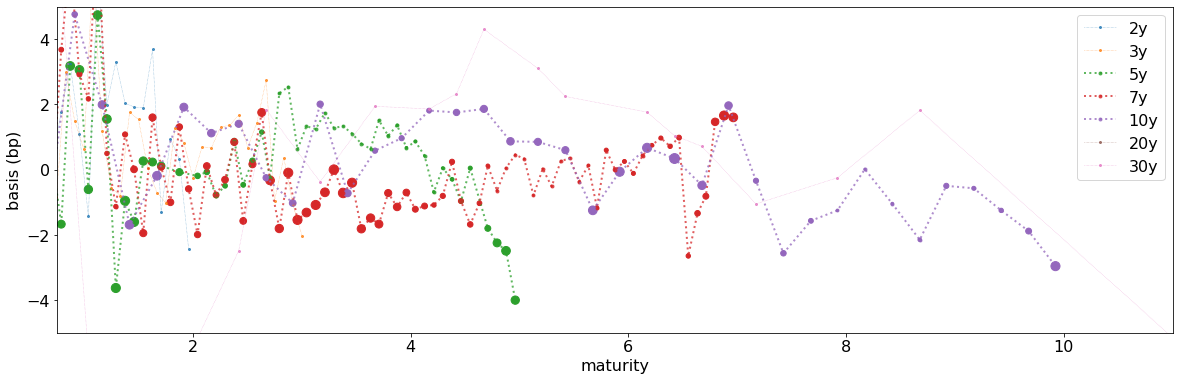

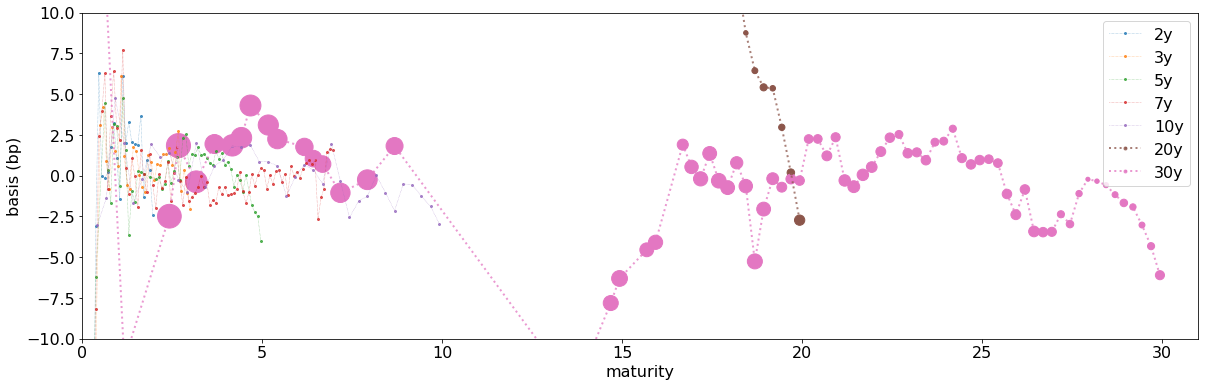

In [151]:
x = df['Time-to-maturity']
y = df['Yield'] * 100

m = pd.Series(y).rolling(window=20, center=True, min_periods= 1).mean().to_numpy()

plt.rcParams['font.size'] = '16'

to_save = True

plt.figure(figsize=(20,6))
plt.scatter(x, y, color = np.ones(3)*0.6, marker = 'o')
plt.plot(x, m, '--', color = np.ones(3)*0.3)
plt.xlabel('maturity'), plt.ylabel('yield (%)')
plt.xlim([0, 31])
plt.grid(axis='y')
if to_save:
    plt.savefig('figs/yield.png')
plt.show()

df['Basis'] = 100 * (y - m)

kw_lims = {'3y':([1, 3.5], [-4,4], [1, 4]), '10y':([0.75, 11], [-5,5], [4, 11]), '30y':([0,31], [-10,10], [15, 40]), }

for idx, (xlim_id, (xlim, ylim, term_focus)) in enumerate(kw_lims.items()):
    
    plt.figure(figsize=(20,6))
    for term, df_g in df.groupby('Term-int'):
        x_g = df_g['Time-to-maturity']
        y_g = df_g['Basis']
        if (term > term_focus[0]) and (term < term_focus[1]): 
            line, = plt.plot(x_g, y_g, '.:', lw=2, alpha = 0.75, label=str(int(term))+'y')
            plt.scatter(x_g, y_g, marker = 'o', s = (100*df_g['interestRate'])**2*10, c = line.get_color())#edgecolors=line.get_color(), facecolors="None")
#            plt.scatter(x_g[-1:], y_g[-1:], marker='o', s = 120, c=line.get_color())
        else:
            line, = plt.plot(x_g, y_g, '.:', ms=4, lw=.5, alpha = 0.75, label=str(int(term))+'y')

    plt.xlim(xlim), plt.ylim(ylim)
    plt.xlabel('maturity'), plt.ylabel('basis (bp)')
    plt.legend(loc=1)
    if to_save:
        plt.savefig(os.path.join('figs', 'yield-' + xlim_id + '.png'))
    plt.show()

    xlim_p, ylim_p = xlim, ylim


In [142]:
df_g['interestRate']

288    0.07625
289    0.07125
290    0.06250
291    0.07500
292    0.07625
        ...   
369    0.02375
370    0.02000
371    0.01875
372    0.02250
373    0.02875
Name: interestRate, Length: 77, dtype: float64